In [1]:
from VAE_architecture import VAE
import pickle
from pytorch_lightning import LightningModule, Trainer, seed_everything
from pytorch_lightning.loggers import TensorBoardLogger
from torch import nn
import torch
from argparse import ArgumentParser
import pytorch_lightning as pl
from torch.nn import functional as F
import random
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from transformers import logging
import os
from matplotlib import pyplot
from PIL import Image
logging.set_verbosity_error()

c:\Users\waren\mambaforge\envs\cc\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")


In [2]:
def create_dataset(path_to_data, batch_size=100, crop_size=224, num_of_channels=1):
    transform = transforms.Compose(
        [
            #transforms.RandomRotation(degrees=(0, 360)),
            transforms.Resize(crop_size),
            transforms.CenterCrop(crop_size),
            transforms.ToTensor(),
            transforms.Grayscale(num_output_channels=num_of_channels),
        ]
    )
    dataset = ImageFolder(root=path_to_data, transform=transform)
    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
        pin_memory=True,
        num_workers=2,
    )
    return dataset, dataloader

In [3]:
dataset, dataloader = create_dataset(
    'test/', 8, 224, 1
)

In [4]:
dataset[1][0].shape

torch.Size([1, 224, 224])

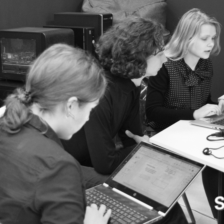

In [5]:
from torchvision.transforms import functional as F

F.to_pil_image(dataset[0][0])

In [6]:
model = VAE.load_from_checkpoint('vae.ckpt')
model.eval()
input_img = dataset[0][0].to(model.device)
with torch.no_grad():
    model.eval()
    z = model.encoder(input_img).flatten()
    model.train()

In [7]:
def Reconstruct(embedding, ckpt_path):
    model = VAE.load_from_checkpoint(ckpt_path)
    model.eval().cuda()
    mu = model.fc_mu(embedding.cuda())
    log_var = model.fc_var(embedding.cuda())
    p, q, z = model.sample(mu, log_var)
    decoded = model.decoder(z)
    return decoded

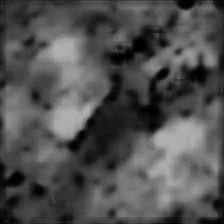

In [8]:
F.to_pil_image(Reconstruct(z, 'vae.ckpt')[0].cpu())